<div>
    <p style="float: right;"><img src="https://media.swipepages.com/2021/2/sirius-logo-principal-tag-1-300.png" height="80px"border="1px"></p>
    
</div>

<h2> Meu primeiro modelo de regressão linear </h2>

Aluno: 

Data:


## Regressão linear?

Regressão linear é um **algoritmo supervisionado** de machine learning usado para **estimar valores contínuos** de algo baseado em uma série de outros dados históricos, portanto olhando para o passado conseguimos “prever” o futuro. Existem 2 tipos de regressão linear: **simples e a múltipla**.


- Regressão linear simples: refere-se quando temos somente uma variável independente (X) para fazermos a predição.
- Regressão linear múltipla: refere-se a várias variáveis independentes (X)usadas para fazer a predição.

O objetivo da regressão linear é **encontrar uma reta** que consiga definir bem os dados e minimizar a diferença entre o valor real e a saída calculada pelo modelo.

[Para saber mais, clique aqui e acesse esse material super bacana no Kaggle](https://www.kaggle.com/marilivb/4-regress-o-linear)


## Definição de variável independente e dependente

* **Variável independente ou preditora:** é aquela que será passada para o modelo, tendo influência na variável que queremos encontrar. Por exemplo: Se queremos prever as vendas de vestidos, a estação do ano pode interferir nas vendas.
* **Variável alvo ou dependente:** é a variável que queremos prever. No exemplo acima seria as vendas de vestidos.

## Exercício 1

Com base nas informações apresentadas acima, elenque para cada situação abaixo qual é a variável dependente e a independente.

1.Está sendo feito um estudo para determinar se os motoristas idosos estão envolvidos em mais mortes de veículos motorizados do que outros motoristas. 

2.É feito um estudo para determinar se a conta mensal no mercado muda com base no número de membros da família.

3.As contas de serviços públicos variam de acordo com o consumo de energia.

4.É feito um estudo para determinar se o ensino superior reduz a taxa de criminalidade em uma população.


Escreva sua resposta aqui:

1. Variável dependente: Taxa de mortes de idosos no trânsito
Variável independente: Taxa de mortes no trânsio

2. Variável dependente: Conta mensal
Variável independente: Número de familiares 

3.Variável dependente:Contas
Variável independente: Consumo de energia

4.Variável dependente: Criminalidade
Variável independente: Ensino superior


## Exercício 2

In [ ]:
# Importando as primeiras bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [ ]:
# O arquivo "ParisHousing.csv" está disponível junto do notebook no moodle. baixe para o seu computador e ao rodar o comando, selecione ele

from google.colab import files
uploaded = files.upload()

Saving ParisHousing.csv to ParisHousing.csv


In [ ]:
# Lendo o arquivo CSV
df = pd.read_csv('ParisHousing.csv')
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


## Variáveis

Tota de variáveis: 17

Lingua: Inglês

* `squareMeters`:       Metros quadrados do imóvel
* `numberOfRooms`:	    Número de quartos
* `hasYard`:	        Tem jardim? (1- Sim, 0- Não)
* `hasPool`:            Tem piscina? (1- Sim, 0- Não)
* `floors`:             Quantidade de andares
* `cityCode`:         	Código da cidade
* `cityPartRange`:      Parte da cidade (quanto maior o alcance, mais exclusivo é o bairro)
* `numPrevOwners`:      Número de proprietários anteriores
* `made`:               Ano
* `isNewBuilt`:         É um imóvel novo? (1- Sim, 0- Não)
* `hasStormProtector`:  Tem protetor de tempestade? (1- Sim, 0- Não)
* `basement`:           Metros quadrados do porão
* `attic`:              Metros quadrados do sótão
* `garage`:         	Tamanho da garagem
* `hasStorageRoom`:     Tem despensa? (1- Sim, 0- Não)
* `hasGuestRoom`:       Número de quartos de hóspedes
* `price`:              Preço do Imóvel (em doláres)


## Exercício 2.1

Valide se há algum valor faltante no dataset, ou missing values. Se houver realize a técnica de preenchimento dos valores, para entender mais sobre a tecnica [acesse esse tutorial](https://minerandodados.com.br/manipulando-missing-values-com-pandas/), caso não haja siga para o próximo exercício.
dica: você está atrás de **info** sobre o dataset? e se existem valores **isnull** ?

In [ ]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

## Exercício 2.2

Os dados acima mostram as características de alguns imóveis de algumas regiões de Paris. Considerando que o preço do imóvel (`price`) é a variável dependente, construa scatterplots (gráfico de disperção) para avaliar a relação entre o preço e as outras variáveis.
dica: sns.pairplot ou sns.regplot

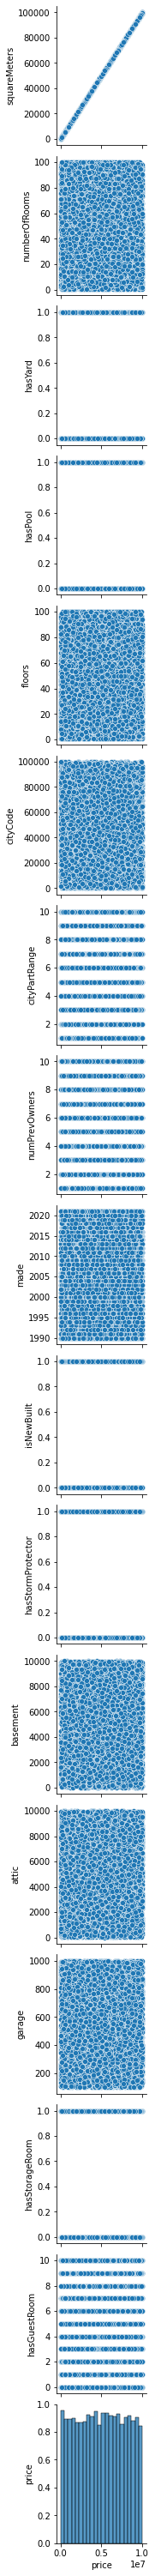

In [ ]:
sns.pairplot(df, x_vars= ['price'])

## Exercício 2.3

Considerando os gráficos acima, quais variáveis apresentam um relacionamento linear com o preço do imóvel?


Resposta: squareMeters


## Exercício 2.4

Calcule o valor de correlação entre as variáveis e o valor do imovel. Qual foi/foram as variáveis que apresentaram correlação forte? Utilize a tabela abaixo como referência.
[Para saber mais sobre correlação leia o inicio deste artigo.](https://medium.com/data-hackers/como-funciona-uma-regress%C3%A3o-linear-f7208fa6c662)
dica: sns.heatmap

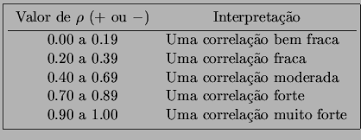

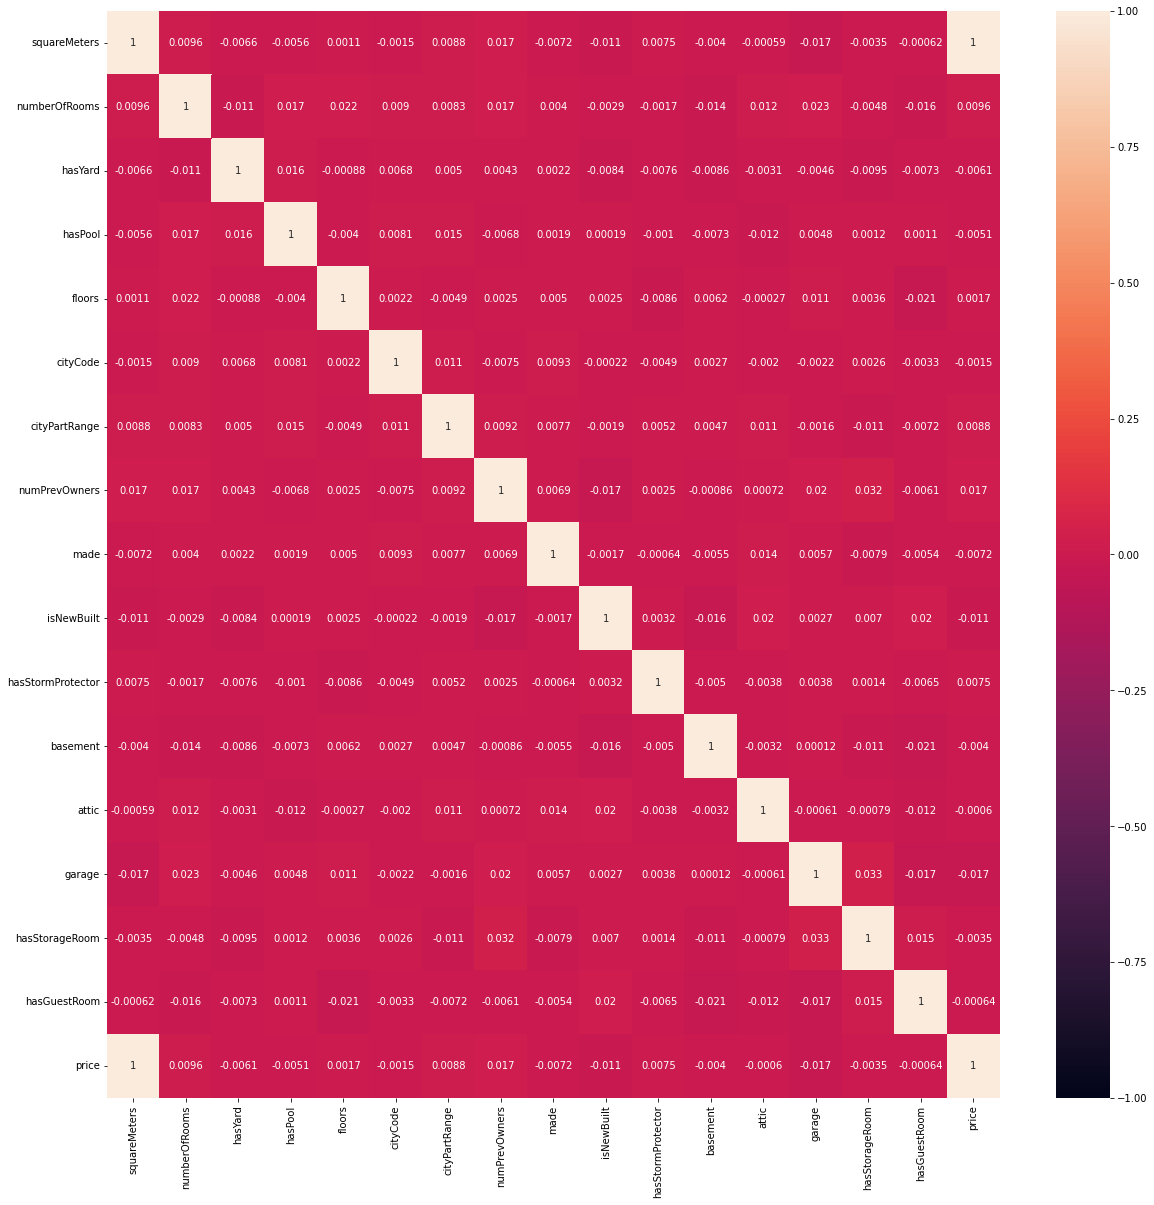

In [ ]:
plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(), vmin= -1, vmax= 1, annot= True)

## Exercício 2.5

Já sabemos que a variável dependente é `price` (preço o do imóvel), agora você precisa decidir quais serão as variáveis independentes que serão fornecidas como entrada para a Regressão Linear.
dica: a resposta aqui vêm do exercício 2.3


In [ ]:
Y = df['price'].values
X = df['squareMeters'].values



## Exercício 3

Divida os dados em teste e treino utilizando a biblioteca do [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), considerando 20% para teste e 80% para treino. 

dica: X_train, X_test, y_train, y_test = train_test_split(preencha aqui) 

In [ ]:
X_train, X_teste, y_train, y_teste = train_test_split( Y, X, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
import statsmodels.api as sm
X_train1 = sm.add_constant(X_train)

## Exercício 4

Construa o modelo de Regressão Linear e treine ele usando os dados de treino.
dica: use o modelo [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) e depois faça o [fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) dele com os dados de treino
Ao final desse passo, você terá treinado o seu primeiro modelo de **Machine Learning** *\o/*

In [ ]:
modelo = LinearRegression().fit(X_train1, y_train)

## Exercício 5

Faça a predição dos dados de teste e armazene em uma variável chamada `predicao_modelo`.
dica: com o modelo treinado, faça o [predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) dele

In [ ]:
predicao_modelo = modelo.predict(X_train1)
predicao_modelo

array([81517.98963966, 78720.72336524, 78103.48855352, ...,
       98714.24983458, 17035.77443194,  3685.84198989])

## Exercício 6

Calcule o R2 (R Quadrado) do modelo e explique o significado do valor calculado. [Para saber mais sobre R2, clique aqui](https://blog.minitab.com/pt/analise-de-regressao-como-interpretar-o-r-quadrado-e-avaliar-a-qualidade-de-ajuste)
dica:o que queremos aqui é encontrar o [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score) olhando para o resultado da predição do teste (y_test) e a predicao do modelo (predicao_modelo) que achamos no passo anterior

In [ ]:
R = modelo.score(X_train1, predicao_modelo)
R

1.0

## Exercício 7

Calcule o Erro Médio Absoluto (MAE) do modelo. [Para saber mais sobre o MAE e outras métricas de avaliação de modelos de regressão linear, clique aqui.](https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96)
dica: O que buscamos aqui é o [mean absolute error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html), usando os mesmos parâmetros do exercício anterior

In [ ]:
mean_absolute_error(y_train, predicao_modelo)

26.46008181828622

## Quer ir além? conheça outros modelos de regressão

Para problemas envolvendo cálculo de valores contínuos podemos utilizar outros algoritmos sem ser a regressão linear
Bônus 1: Refaça os exercícios de 4 a 7 usando: 
- [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html), 
- [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html), 
- [Árvore de decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

Bônus 2: Refaça os exercícios de 4 a 7 usando: 
- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) -> from sklearn.ensemble import RandomForestRegressor


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=01b9db29-578f-42da-8c1b-e90379f1f825' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>